<a href="https://colab.research.google.com/github/NikuDubenco/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Nicolae_Dubenco_DS_Unit_1_SC_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
# TODO
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data

--2019-05-10 15:54:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32218 (31K) [application/x-httpd-php]
Saving to: ‘crx.data.2’

crx.data.2          100%[===================>]  31.46K  --.-KB/s    in 0.04s   

2019-05-10 15:54:08 (852 KB/s) - ‘crx.data.2’ saved [32218/32218]



In [58]:
df = pd.read_csv('crx.data', header=None, names=['A1', 'A2', 'A3', 'A4', 'A5', 
                                                 'A6', 'A7', 'A8', 'A9', 'A10', 
                                                 'A11', 'A12', 'A13', 'A14',
                                                 'A15', 'A16'])

print(df.shape)
df.head()

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [59]:
df.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [60]:
df.A1.unique(), df.A2.unique(), df.A3.unique()

(array(['b', 'a', '?'], dtype=object),
 array(['30.83', '58.67', '24.50', '27.83', '20.17', '32.08', '33.17',
        '22.92', '54.42', '42.50', '22.08', '29.92', '38.25', '48.08',
        '45.83', '36.67', '28.25', '23.25', '21.83', '19.17', '25.00',
        '47.75', '27.42', '41.17', '15.83', '47.00', '56.58', '57.42',
        '42.08', '29.25', '42.00', '49.50', '36.75', '22.58', '27.25',
        '23.00', '27.75', '54.58', '34.17', '28.92', '29.67', '39.58',
        '56.42', '54.33', '41.00', '31.92', '41.50', '23.92', '25.75',
        '26.00', '37.42', '34.92', '34.25', '23.33', '23.17', '44.33',
        '35.17', '43.25', '56.75', '31.67', '23.42', '20.42', '26.67',
        '36.00', '25.50', '19.42', '32.33', '34.83', '38.58', '44.25',
        '44.83', '20.67', '34.08', '21.67', '21.50', '49.58', '27.67',
        '39.83', '?', '37.17', '25.67', '34.00', '49.00', '62.50', '31.42',
        '52.33', '28.75', '28.58', '22.50', '28.50', '37.50', '35.25',
        '18.67', '54.83', '40.92'

In [61]:
df.A4.unique(), df.A5.unique(), df.A6.unique()

(array(['u', 'y', '?', 'l'], dtype=object),
 array(['g', 'p', '?', 'gg'], dtype=object),
 array(['w', 'q', 'm', 'r', 'cc', 'k', 'c', 'd', 'x', 'i', 'e', 'aa', 'ff',
        'j', '?'], dtype=object))

In [0]:
df = df.replace({'?':np.NaN})

In [63]:
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null object
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null int64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null object
A15    690 non-null int64
A16    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [65]:
df.A11.unique()

array([ 1,  6,  0,  5,  7, 10,  3, 17,  2,  9,  8, 15, 11, 12, 40, 23,  4,
       20, 67, 14, 16, 13, 19])

In [66]:
df.A14.unique()

array(['00202', '00043', '00280', '00100', '00120', '00360', '00164',
       '00080', '00180', '00052', '00128', '00260', '00000', '00320',
       '00396', '00096', '00200', '00300', '00145', '00500', '00168',
       '00434', '00583', '00030', '00240', '00070', '00455', '00311',
       '00216', '00491', '00400', '00239', '00160', '00711', '00250',
       '00520', '00515', '00420', nan, '00980', '00443', '00140', '00094',
       '00368', '00288', '00928', '00188', '00112', '00171', '00268',
       '00167', '00075', '00152', '00176', '00329', '00212', '00410',
       '00274', '00375', '00408', '00350', '00204', '00040', '00181',
       '00399', '00440', '00093', '00060', '00395', '00393', '00021',
       '00029', '00102', '00431', '00370', '00024', '00020', '00129',
       '00510', '00195', '00144', '00380', '00049', '00050', '00381',
       '00150', '00117', '00056', '00211', '00230', '00156', '00022',
       '00228', '00519', '00253', '00487', '00220', '00088', '00073',
       '00121',

In [0]:
df[['A2', 'A14']] = df[['A2', 'A14']].astype('float64')

In [79]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null float64
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null int64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null float64
A15    690 non-null int64
A16    690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.3+ KB


In [81]:
df.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [85]:
df.describe(include='all')

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,678,678.000000,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677.000000,690.000000,690
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,-
freq,468,NaN,NaN,519,519,137,399,NaN,361,395,NaN,374,625,NaN,NaN,383
mean,NaN,31.568171,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,184.014771,1017.385507,NaN
std,NaN,11.957862,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,173.806768,5210.102598,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,22.602500,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,75.000000,0.000000,NaN
50%,NaN,28.460000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,160.000000,5.000000,NaN
75%,NaN,38.230000,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,276.000000,395.500000,NaN


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


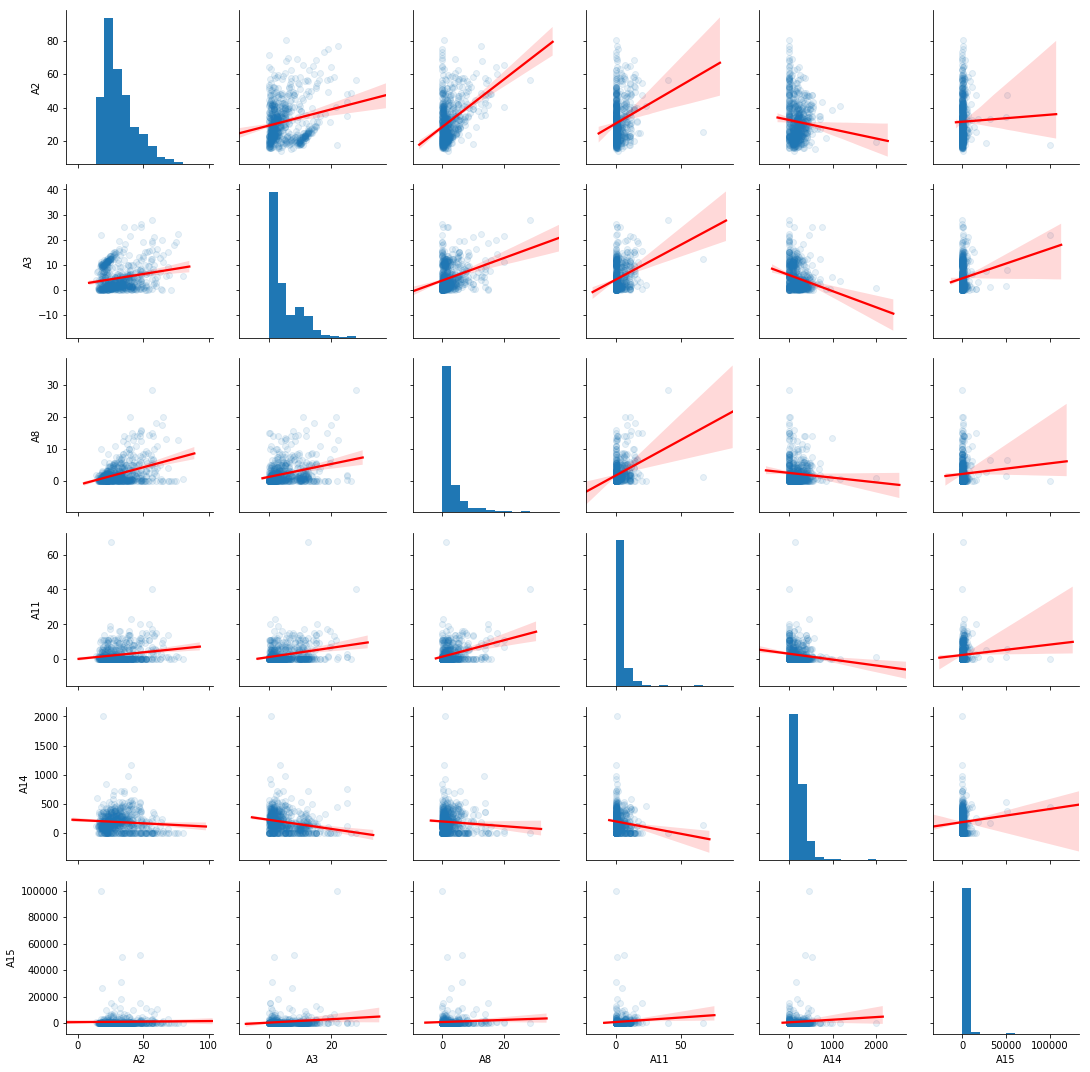

In [90]:
sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

In [96]:
# Create approved for credit
df_approved = df[df.A16 == "+"]
print(df_approved.shape)
df_approved.head()

(307, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [106]:
# Null Hypothesis value is 0.
stats.ttest_1samp(df_approved['A2'], 0, nan_policy='omit')

Ttest_1sampResult(statistic=45.97342606135877, pvalue=6.4964550720881594e-139)

In [102]:
# Null Hypothesis value is .5
stats.ttest_1samp(df_approved['A2'], .5, nan_policy='omit')

Ttest_1sampResult(statistic=45.291742260162124, pvalue=3.423943736856431e-137)

In [109]:
# Null Hypothesis value is 1
stats.ttest_1samp(df_approved['A2'], 1, nan_policy='omit')

Ttest_1sampResult(statistic=44.61005845896548, pvalue=1.886841661602601e-135)

In [124]:
for i in ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']:
  print(
    '         '*10, '\n',
    '+-+-+-+-'*10, '\n',
    i, '\n',
    '         '*10, '\n',  
    '# Null Hypothesis value is 0:  \n',
    stats.ttest_1samp(df_approved[i], 0, nan_policy='omit'), '\n',
    '*******'*10, '\n',
    '# Null Hypothesis value is .5:  \n',
    stats.ttest_1samp(df_approved[i], .5, nan_policy='omit'), '\n',
    '*******'*10, '\n',
    '# Null Hypothesis value is 1:  \n',
    stats.ttest_1samp(df_approved[i], 1, nan_policy='omit'))

                                                                                           
 +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+- 
 A2 
                                                                                            
 # Null Hypothesis value is 0:  
 Ttest_1sampResult(statistic=45.97342606135877, pvalue=6.4964550720881594e-139) 
 ********************************************************************** 
 # Null Hypothesis value is .5:  
 Ttest_1sampResult(statistic=45.291742260162124, pvalue=3.423943736856431e-137) 
 ********************************************************************** 
 # Null Hypothesis value is 1:  
 Ttest_1sampResult(statistic=44.61005845896548, pvalue=1.886841661602601e-135)
                                                                                           
 +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+- 
 A3 
                                                            

In [97]:
# Create rejected for credit
df_rejected = df[df.A16 == "-"]
print(df_rejected.shape)
df_rejected.head()

(383, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.33,7.5,u,g,e,bb,1.585,t,f,0,t,s,420.0,0,-
71,b,34.83,4.0,u,g,d,bb,12.500,t,f,0,t,g,NaN,0,-
72,a,38.58,5.0,u,g,cc,v,13.500,t,f,0,t,g,980.0,0,-
73,b,44.25,0.5,u,g,m,v,10.750,t,f,0,f,s,400.0,0,-
74,b,44.83,7.0,y,p,c,v,1.625,f,f,0,f,g,160.0,2,-


In [123]:
for i in ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']:
  print(
    '         '*10, '\n',
    '+-+-+-+-'*10, '\n',
    i, '\n',
    '         '*10, '\n',  
    '# Null Hypothesis value is 0:  \n',
    stats.ttest_1samp(df_rejected[i], 0, nan_policy='omit'), '\n',
    '*******'*10, '\n',
    '# Null Hypothesis value is .5:  \n',
    stats.ttest_1samp(df_rejected[i], .5, nan_policy='omit'), '\n',
    '*******'*10, '\n',
    '# Null Hypothesis value is 1:  \n',
    stats.ttest_1samp(df_rejected[i], 1, nan_policy='omit'))

                                                                                           
 +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+- 
 A2 
                                                                                            
 # Null Hypothesis value is 0:  
 Ttest_1sampResult(statistic=52.72252131659304, pvalue=1.0865560275945647e-174) 
 ********************************************************************** 
 # Null Hypothesis value is .5:  
 Ttest_1sampResult(statistic=51.838159509119116, pvalue=2.7696876994315467e-172) 
 ********************************************************************** 
 # Null Hypothesis value is 1:  
 Ttest_1sampResult(statistic=50.953797701645186, pvalue=7.587702684551264e-170)
                                                                                           
 +-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+- 
 A3 
                                                          

## ttest_ind

In [120]:
print(df_approved['A2'].mean())
print(df_rejected['A2'].mean())

stats.ttest_ind(df_approved['A2'], df_rejected['A2'], nan_policy='omit')

33.7204918032787
29.80823056300268


Ttest_indResult(statistic=4.2922156166315535, pvalue=2.0276637071781407e-05)

In [125]:
for i in ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']:
  print(
      '----'*20, '\n',
      i, '\n',
      
      'approved mean: ', df_approved[i].mean(), '\n',
        'rejected mean: ', df_rejected[i].mean(), '\n',

        stats.ttest_ind(df_approved[i], df_rejected[i], nan_policy='omit'))

-------------------------------------------------------------------------------- 
 A2 
 approved mean:  33.7204918032787 
 rejected mean:  29.80823056300268 
 Ttest_indResult(statistic=4.2922156166315535, pvalue=2.0276637071781407e-05)
-------------------------------------------------------------------------------- 
 A3 
 approved mean:  5.904951140065144 
 rejected mean:  3.839947780678851 
 Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)
-------------------------------------------------------------------------------- 
 A8 
 approved mean:  3.427899022801302 
 rejected mean:  1.2579242819843346 
 Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)
-------------------------------------------------------------------------------- 
 A11 
 approved mean:  4.605863192182411 
 rejected mean:  0.6318537859007833 
 Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)
-------------------------------------------------------

## Categorical data

In [89]:
# TODO
for i in ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']:
    contingency_table = pd.crosstab(df['A16'], df[i])
    print('++++' * 20)
    print('----' * 20)
    print('++++' * 20)
    print(contingency_table)
    print(''' ''')
    print('>>>>> <<<<<   ' * 2)
    print(''' ''')
    chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    print('chi-squared = ', chi_squared)
    print('p-value = ', p_value)
    print('degree of freedom = ', dof)
    print('expected: \n', np.array(expected))
    print('''     
    ''')

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
--------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
A1     a    b
A16          
+     98  206
-    112  262
 
>>>>> <<<<<   >>>>> <<<<<   
 
chi-squared =  0.31128326491619945
p-value =  0.5768937883001117
degree of freedom =  1
expected: 
 [[ 94.15929204 209.84070796]
 [115.84070796 258.15929204]]
     
    
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
--------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
A4   l    u    y
A16             
+    2  256   45
-    0  263  118
 
>>>>> <<<<<   >>>>> <<<<<   
 
chi-squared =  26.234074966202144
p-value =  2.010680204180363e-06
degree of freedom =  2
expected: 
 [[  0.88596491 229.90789474  72.20614035]
 [  1.1140

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

*Your words here!*

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- A2: reject the null hypothesis for feature A2, it's influence the rezult
-
-
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
-
- A6 =>> Reject the null hypothesis that approve/reject credit  and feature A6 are independent. They have to be associated. Pvalue:  0 (or 3.4999300402715717e-15)
- A1 =>> Don't reject the null hypothesis that approve/reject credit  and feature A6 are independent. They are not associated. Pvalue: 0.5768937883001117
-
- What was the most challenging part of this sprint challenge?
- Second and third parts
-
-